In [2]:
import pandas as pd

In [3]:
questions_post = pd.read_csv('questionposts.csv', on_bad_lines='skip')
questions = pd.read_csv('questions.csv')
clients = pd.read_csv('clients.csv')


C:\Users\Gustavo Aniceto\AppData\Local\Temp\ipykernel_28796\2555645621.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  questions_post = pd.read_csv('questionposts.csv', on_bad_lines='skip')


In [4]:
question_posts_with_info = questions_post.merge(questions, left_on='QuestionUno', right_on='QuestionUno').merge(clients, left_on='AskedByClientUno', right_on='ClientUno')
sorted_data = question_posts_with_info.sort_values(['ClientUno', 'Id_x'])
client_questions = sorted_data.iloc[::2].reset_index(drop=True)
attorney_answers = sorted_data.iloc[1::2].reset_index(drop=True)
sorted_data = question_posts_with_info.sort_values(['ClientUno', 'Id_x'])
def separate_questions_and_answers(posts):
    questions = posts.iloc[::2].astype(str).tolist()
    answers = posts.iloc[1::2].astype(str).tolist()
    
    # Pad lists with None if they have different lengths
    if len(questions) > len(answers):
        answers.extend([None] * (len(questions) - len(answers)))
    elif len(answers) > len(questions):
        questions.extend([None] * (len(answers) - len(questions)))

    return pd.Series({'ClientQuestions': '\n\n'.join(filter(None, questions)), 'AttorneyAnswers': '\n\n'.join(filter(None, answers))})


In [5]:
qa_pairs = sorted_data.groupby('ClientUno')['PostText'].apply(separate_questions_and_answers).reset_index()
qa_pairs.rename(columns={'level_1' : 'Type'}, inplace=True)

In [6]:
import spacy
nlp = spacy.load('en_core_web_sm')

C:\Users\Gustavo Aniceto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


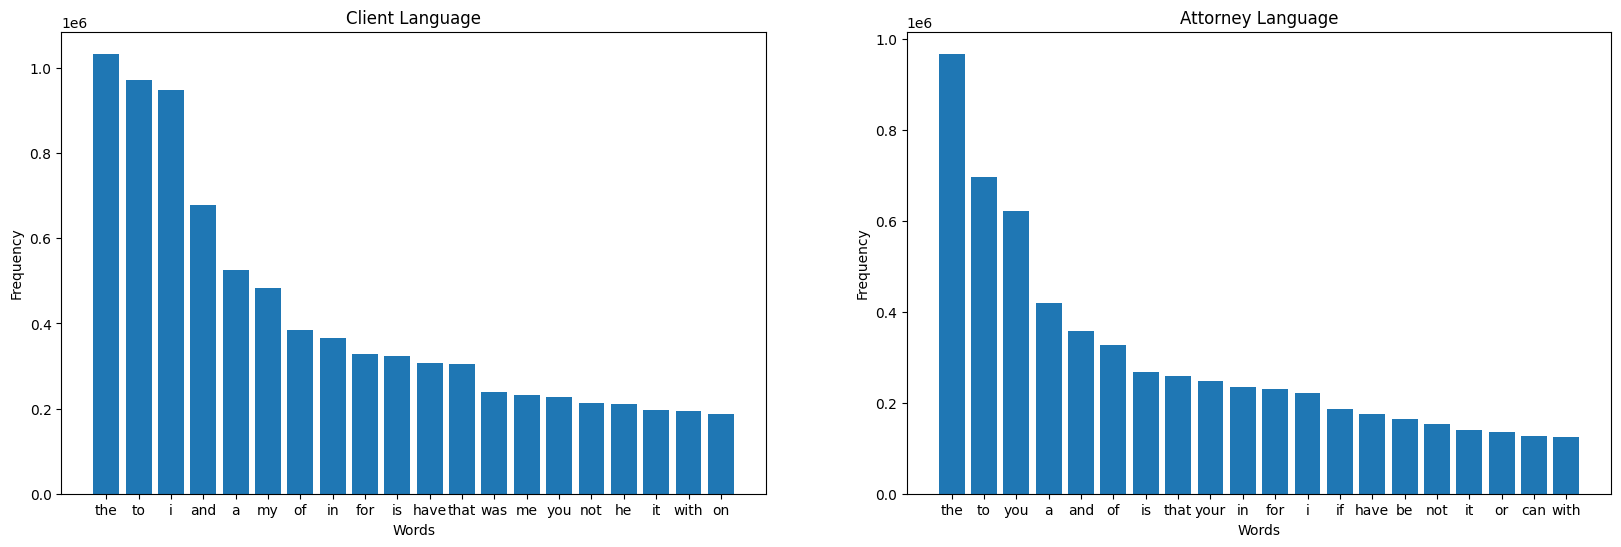

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    return text

# Assuming your DataFrame is named 'QuestionPosts'
client_text = ' '.join(qa_pairs[qa_pairs['Type'] == 'ClientQuestions']['PostText'])
attorney_text = ' '.join(qa_pairs[qa_pairs['Type'] == 'AttorneyAnswers']['PostText'])

# Preprocess and split the text into words
client_words = preprocess_text(client_text).split()
attorney_words = preprocess_text(attorney_text).split()

# Count the most common words
num_words = 20
client_word_counts = Counter(client_words).most_common(num_words)
attorney_word_counts = Counter(attorney_words).most_common(num_words)

# Separate words and counts
client_words, client_counts = zip(*client_word_counts)
attorney_words, attorney_counts = zip(*attorney_word_counts)

# Plot bar chart
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.bar(client_words, client_counts)
plt.title('Client Language')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(attorney_words, attorney_counts)
plt.title('Attorney Language')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

In [10]:
from collections import Counter

def extract_common_words(text, top_n=10, chunk_size=100000):
    words = []
    
    for i in range(0, len(text), chunk_size):
        chunk = text[i:i+chunk_size]
        doc = nlp(chunk)
        words.extend([token.text.lower() for token in doc if token.is_alpha and not token.is_stop])

    word_freq = Counter(words)
    return word_freq.most_common(top_n)

In [11]:
# Concatenate all the text for clients and attorneys separately
client_text = ' '.join(qa_pairs[qa_pairs['Type'] == 'ClientQuestions']['PostText'].values)
attorney_text = ' '.join(qa_pairs[qa_pairs['Type'] == 'AttorneyAnswers']['PostText'].values)

# Extract common words for clients and attorneys
client_common_words = extract_common_words(client_text)
attorney_common_words = extract_common_words(attorney_text)


KeyboardInterrupt: 

In [ ]:

# Compare the common words used by clients and attorneys
print("Common words used by clients:")
for word, freq in client_common_words:
    print(f"{word}: {freq}")

print("\nCommon words used by attorneys:")
for word, freq in attorney_common_words:
    print(f"{word}: {freq}")